<a href="https://colab.research.google.com/github/basanab/mu_e_scatt/blob/main/ML_modl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from scipy.optimize import curve_fit
from sklearn.metrics import mean_absolute_error


In [ ]:
# df=pd.read_excel("/content/drive/MyDrive/ColabNotebooks/muon_data.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/datasheet_python.csv", sep="\t")
df

,E_mu,Theta_e,Theta_mu,Emu_p,Ee_p
0,0.5,0.000,NaN,0.479139,0.021371
1,0.5,0.001,NaN,0.479139,0.021371
2,0.5,0.002,0.000061,0.479141,0.021369
3,0.5,0.003,0.000119,0.479143,0.021367
4,0.5,0.004,0.000170,0.479146,0.021364
...,...,...,...,...,...
99995,1000.0,0.045,0.000023,999.496246,0.504264
99996,1000.0,0.046,0.000022,999.517929,0.482581
99997,1000.0,0.047,0.000022,999.538244,0.462266
99998,1000.0,0.048,0.000021,999.557302,0.443208


In [ ]:
df_sort= df.dropna()

In [ ]:
# df_sort


In [ ]:
df_sort.reset_index(level=None, drop=True, inplace=True)
df_sort

,E_mu,Theta_e,Theta_mu,Emu_p,Ee_p
0,0.5,0.002,0.000061,0.479141,0.021369
1,0.5,0.003,0.000119,0.479143,0.021367
2,0.5,0.004,0.000170,0.479146,0.021364
3,0.5,0.005,0.000218,0.479150,0.021360
4,0.5,0.006,0.000265,0.479155,0.021355
...,...,...,...,...,...
97994,1000.0,0.045,0.000023,999.496246,0.504264
97995,1000.0,0.046,0.000022,999.517929,0.482581
97996,1000.0,0.047,0.000022,999.538244,0.462266
97997,1000.0,0.048,0.000021,999.557302,0.443208


In [ ]:
# df1 =df_sort[df_sort['E_mu']>150]
# df1 = df1[df1["E_mu"]<200]
# plt.scatter(df1["Theta_e"],df1["Theta_mu"])


In [ ]:
# Create a copy for further processing
dataset = df_sort[['E_mu', 	'Theta_e', 	'Theta_mu' 	]]
# dataset= df.copy()
# Check for null values
dataset.isna().sum()

E_mu        0
Theta_e     0
Theta_mu    0
dtype: int64

In [ ]:
# Split the Dataset and create train and test sets
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(97999, 3) (78399, 3) (19600, 3)


,count,mean,std,min,25%,50%,75%,max
E_mu,78399.0,500.124039,288.486745,0.500000,250.500000,500.500000,749.500000,1000.000000
Theta_e,78399.0,0.024973,0.014134,0.001000,0.013000,0.025000,0.037000,0.049000
Theta_mu,78399.0,0.000367,0.000736,0.000021,0.000054,0.000109,0.000292,0.004831


In [ ]:
# Separate labels and features
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop("E_mu")
test_labels = test_features.pop("E_mu")

In [ ]:
print(train_features)
print(test_features)
print(train_labels)
print(test_labels)

       Theta_e  Theta_mu
46902    0.011  0.000194
45715    0.049  0.000045
40929    0.016  0.000153
40362    0.037  0.000067
96483    0.004  0.000259
...        ...       ...
50879    0.019  0.000104
26807    0.006  0.000619
3012     0.025  0.001294
13719    0.001  0.004643
46195    0.039  0.000056

[78399 rows x 2 columns]
       Theta_e  Theta_mu
2        0.004  0.000170
10       0.012  0.000543
13       0.015  0.000679
20       0.022  0.000993
21       0.023  0.001037
...        ...       ...
97958    0.009  0.000114
97965    0.016  0.000064
97972    0.023  0.000044
97976    0.027  0.000038
97979    0.030  0.000034

[19600 rows x 2 columns]
46902    479.0
45715    466.5
40929    418.0
40362    412.0
96483    985.0
         ...  
50879    519.5
26807    274.0
3012      31.0
13719    140.5
46195    471.5
Name: E_mu, Length: 78399, dtype: float64
2           0.5
10          0.5
13          0.5
20          0.5
21          0.5
          ...  
97958    1000.0
97965    1000.0
97972    1000

In [ ]:
#normalisation
from sklearn.preprocessing import MinMaxScaler

feature_scaler = MinMaxScaler()
label_scaler = MinMaxScaler()
# Fit on Training Data
feature_scaler.fit(train_features.values)
label_scaler.fit(train_labels.values.reshape(-1, 1))

MinMaxScaler()

In [ ]:
# Transform both training and testing data
train_features = feature_scaler.transform(train_features.values)
test_features = feature_scaler.transform(test_features.values)
train_labels = label_scaler.transform(train_labels.values.reshape(-1, 1))
test_labels = label_scaler.transform(test_labels.values.reshape(-1, 1))

In [ ]:
# After normalization
print(train_features)
print(test_features)
print(train_labels)
print(test_labels)

[[0.20833333 0.03597404]
 [1.         0.00495474]
 [0.3125     0.02742555]
 ...
 [0.5        0.26475055]
 [0.         0.96084732]
 [0.79166667 0.00721563]]
[[0.0625     0.03091352]
 [0.22916667 0.10847583]
 [0.29166667 0.13682684]
 ...
 [0.45833333 0.00490337]
 [0.54166667 0.0035346 ]
 [0.60416667 0.00274749]]
[[0.47873937]
 [0.46623312]
 [0.41770885]
 ...
 [0.03051526]
 [0.14007004]
 [0.47123562]]
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [ ]:
#to check the normalization
print(np.max(train_features))
print(np.max(test_features))
print(np.max(train_labels))
print(np.max(test_labels))


1.0000000000000002
0.9999999999999999
0.9999999999999999
0.9999999999999999


In [ ]:
# Now let's create a Deep Neural Network to train a regression model on our data.
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])


In [ ]:
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='Adam',

)


In [ ]:
model.compile(optimizer="Adam",
               loss="mean_squared_error")

In [ ]:
# Now let's train the model
history = model.fit(epochs=100, x=train_features, y=train_labels,
          validation_data=(test_features, test_labels), verbose=0)

In [ ]:
# Function to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)

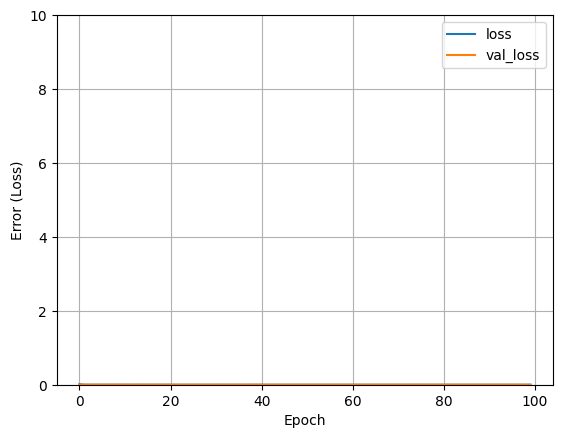

In [ ]:
plot_loss(history)

In [ ]:
# Model evaluation on testing dataset
model.evaluate(test_features, test_labels)

613/613 [==============================] - 1s 1ms/step - loss: 2.9947e-04


0.00029947038274258375

In [ ]:
# Load and perform predictions
results = model.predict(test_features)

613/613 [==============================] - 1s 2ms/step


In [ ]:
# We can decode using the scikit-learn object to get the result
decoded_result = label_scaler.inverse_transform(results.reshape(-1,1))
print(decoded_result)
print(decoded_result.shape)
decoded_testlabels =label_scaler.inverse_transform(test_labels)

[[486.80167]
 [158.97577]
 [100.01241]
 ...
 [988.34717]
 [987.1984 ]
 [988.6777 ]]
(19600, 1)


Text(0, 0.5, 'Predicted Energy (GeV)')

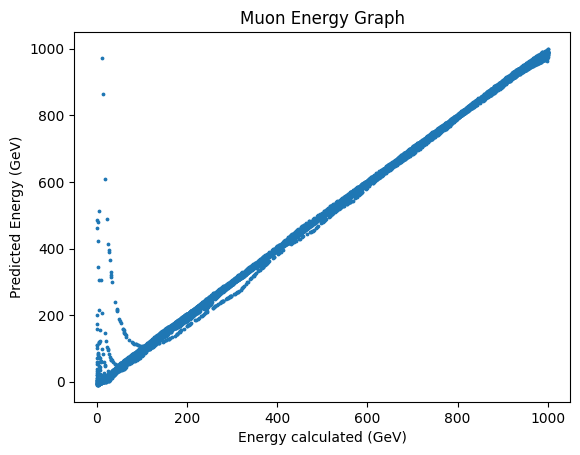

In [ ]:
plt.scatter(decoded_testlabels, decoded_result, s=3)
plt.title("Muon Energy Graph")
plt.xlabel("Energy calculated (GeV)")
plt.ylabel("Predicted Energy (GeV)")

In [ ]:
print(np.max(results))
print(np.min(results))

0.99906385
-0.009970248


In [ ]:
# calculate the mean absolute error
# calculate errors for minmax normalized 100 epoch model
mae = mean_absolute_error(decoded_testlabels, decoded_result)
# report error
print(mae)

5.043801996330826


In [ ]:
enrgyDF= pd.DataFrame(decoded_testlabels, columns= ["real energy"])


In [ ]:
enrgyDF['predicted energy']= decoded_result

In [ ]:
enrgyDF # for MinMaxscaler normalization function

,real energy,predicted energy
0,0.5,486.801666
1,0.5,158.975769
2,0.5,100.012413
3,0.5,37.613846
4,0.5,32.217377
...,...,...
19595,1000.0,990.113708
19596,1000.0,990.831543
19597,1000.0,988.347168
19598,1000.0,987.198425


In [ ]:
#to get the difference in energy between PREDICTED and  REAL values
diff= decoded_result- decoded_testlabels
# plt.hist(diff,bins= 500)

In [ ]:
enrgyDF.to_csv("mdl6_minmax_energysheet.csv", header=True, index=False, sep='\t', mode='a')

In [ ]:
def gauss(x,amp,mu,sigma):
    return (amp/np.sqrt(sigma))*np.exp(-(x-mu)**2 / 2*sigma**2)

This is n==> [  0.   1.   0.   0.   1.   0.   0.   1.   0.   2.   0.   0.   0.   4.
   1.   2.   2.   1.   1.   2.   0.   2.   1.   2.   5.   2.   2.   1.
   1.   1.   0.   2.   0.   0.   1.   2.   2.   0.   3.   1.   1.   1.
   2.   2.   0.   5.   0.   4.   3.   1.   1.   1.   2.   2.   2.   2.
   4.   3.   2.   4.   2.   2.   2.   4.   1.   1.   2.   1.   3.   1.
   1.   1.   2.   5.   1.   4.   2.   2.   4.   4.   4.   1.   3.   4.
   5.   9.   1.   3.   0.   1.   3.   6.   3.   3.   8.   3.   3.   3.
   2.   6.   4.   8.   4.   6.   1.   5.   5.   6.   4.   8.   1.   5.
   3.   2.   6.  10.   2.   8.   6.   6.   5.   6.   5.   0.   5.   2.
   4.   9.   4.   7.   5.   9.   3.   5.   8.   3.   8.  12.  16.   5.
   6.   8.   7.   9.   7.   9.   7.   9.   9.  10.   6.   8.  12.  11.
  17.  16.   7.   9.   6.  17.  12.   9.   8.  13.  10.  23.  13.  14.
  13.   7.  12.  19.   8.  17.   9.  13.  17.   8.  18.  18.  13.  17.
  13.  15.   9.  13.  17.  19.  20.  15.  22.  23.  17.  16.  21

<ipython-input-31-679ff3a10ba0>:2: RuntimeWarning: invalid value encountered in sqrt
  return (amp/np.sqrt(sigma))*np.exp(-(x-mu)**2 / 2*sigma**2)


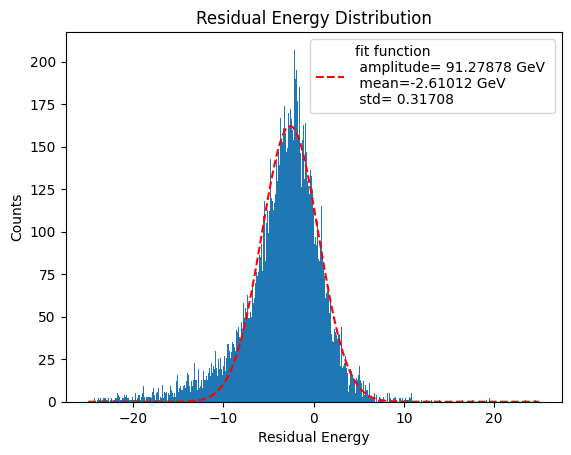

In [ ]:
#for Minmax all normalized
x= np.linspace(-25,25,700)
n,bins,patches = plt.hist(diff,bins= 700,range= (-25,25))#, ); # range= (-0.5,1.5)
print("This is n==>",n, bins, patches)
plt.title('Residual Energy Distribution')
plt.xlabel('Residual Energy')
plt.ylabel('Counts')
y=n
print(max(y))
popt, pcov = curve_fit(gauss, x,y)#p0= (300,0.0,0.5)) # p0= (amp, mean, satndard deviation)===> guessed
y= gauss(x, popt[0], popt[1], popt[2])
plt.plot(x,y,color= 'r', linestyle='dashed', label='fit function \n amplitude= {} GeV \n mean={} GeV \n std= {}'.format(round(popt[0],5),round(popt[1],5),round(popt[2],5)));
tbl= np.column_stack((popt[0],popt[1],popt[2]))
parameters= pd.DataFrame(tbl, columns=['amplitude','mean', 'standard deviation'])
print(parameters)
plt.legend(loc='best')
# print(popt[0],popt[1],popt[2]) # gives actual (amp, mean, standard deviation)
plt.show()

In [ ]:
# Save model
model.save("ML6_mdl.h5")

In [ ]:
# Save the min and scale values
np.save('scaler_min_mdl6.npy', label_scaler.min_)
np.save('scaler_scale_mdl6.npy', label_scaler.scale_)
